# <font color='firebrick'> **ExploreAI INTERNSHIP PROJECT** <font>

**This internship project has been completed by the following persons in Team23 of the ExploreAI Academy;**

*   **DANIEL IFEDIBA   (Head Data Scientist)**
    

*   **JEFF OUMA   (Data Scientist II)**

    
*   **STELLA MUKUHI KAMAU   (Data Scientist III)**

    
*   **UBASINACHI ELEONU   (Data Scientist IV)**

    
*   **OBINNA UZEGBU   (Data Engineer I)**

    
*   **GEORGE KIBE   (Data Engineer II)**



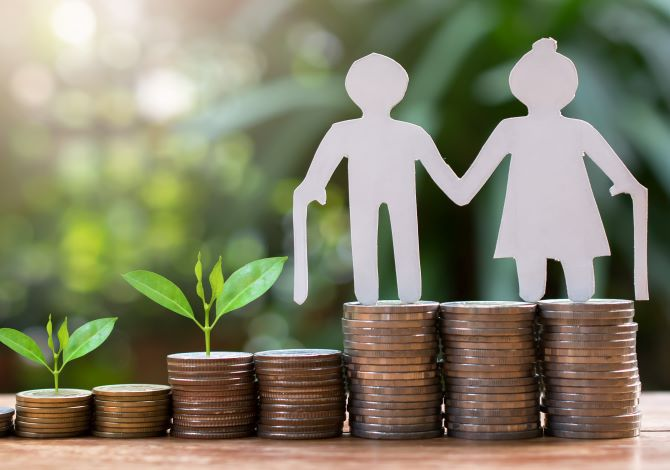

<a id="cont"></a>

## <font color='goldenrod'>**Table of Contents**</font>

<a href=#one>1. Introduction</a>

<a href=#two>2. Importing Packages</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Feature Engineering</a>

<a href=#six>6. Building Of Models</a>

<a href=#seven>7. Model Performance</a>


 <a id="one"></a>
## <font color='goldenrod'>**1. Introduction**</font>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Introduction ⚡ |
| :--------------------------- |
| In this section, we give an overview of the project, problem statement and what is expected of us. |

---

### **1.1. Problem Description**

Predict the ideal income (the maximum amount that will last until death with a certain confidence level) a person must draw from retirement using personal, investment and retirement data.
Ideal income is defined as the maximum amount that will last until death with a certain confidence level.

### **1.2. Data Description**

The data consists of personal, investment, and retirement-specific data on an individual level with the eventual ideal income in retirement.

*   Train dataset

*   Validation dataset

*   Test dataset

The training and validation sets for parameter optimization and the testing set for metric reporting and analysis of generalization capacity.

 

 <a id="two"></a>
## <font color='goldenrod'>**2. Importing Packages**</font>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section, we import the necessary libraries that will be used throughout analysis and modelling. |

---

In [ ]:
!pip install catboost
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler # to normaliza our data to handle outliers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder



from catboost import CatBoostRegressor
import xgboost as xg


# Function to split data into different groups
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, roc_auc_score
import statsmodels.api as sm

<a id="three"></a>
## <font color='goldenrod'>**3. Loading Data**</font>
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section, we loaded the train, test and validation dataset into a DataFrame. |

---



In [ ]:
df_train = pd.read_csv('nedgroup_training_data.csv') # importing the training data
df_validation = pd.read_csv('nedgroup_validation_data.csv') # importing the validation data
df_test = pd.read_csv('nedgroup_testing_data.csv') # importing the testing data 


<a id="four"></a>
## <font color='goldenrod'>**4. Exploratory Data Analysis (EDA)**</font>
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description:  ⚡ |
| :--------------------------- |
| In this section, we cleaned the dataset and perform and indepth analysis of all the variables in the DataFrame. |

---


### **4.1. Statistical EDA**

#### **4.1.1 Basic Information Across All Datasets**

Below is a simple code that shows the datatypes for the various features we have in our data set, and the total number of rows.

In [ ]:
print('*****************************************************')
print('Genral Information About The Train Dataset')
print('*****************************************************')
print(df_train.info())
print('*****************************************************')
print()
print('*****************************************************')
print('Genral Information About The Validation Dataset')
print('*****************************************************')
print(df_validation.info())
print('*****************************************************')
print()
print('*****************************************************')
print('Genral Information About The Test Dataset')
print('*****************************************************')
print(df_test.info())
print('*****************************************************')

*****************************************************
Genral Information About The Train Dataset
*****************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23944 entries, 0 to 23943
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               23944 non-null  int64  
 1   GENDER                                   23944 non-null  object 
 2   RETIREMENT_AGE                           23944 non-null  int64  
 3   RETIREMENT_FUND_VALUE                    23944 non-null  int64  
 4   DEPT_VALUE                               23944 non-null  int64  
 5   CURRENT_NET_MONTHLY_INCOME               23944 non-null  int64  
 6   SPARE_CASH_VALUE                         23944 non-null  int64  
 7   FINANCIALLY_SUPPORT_PARTNER              23944 non-null  object 
 8   FINANCIALLY_SUPPORT_CHILDREN       

#### **4.1.2. Checking For Null Values**

This was done to find out if there are empty or null values in our data sets.

In [ ]:
print('*****************************************************')
print('Checking For Null Values In The Train Dataset')
print('*****************************************************')
print(df_train.isnull().sum())
print('*****************************************************')
print()
print('*****************************************************')
print('Checking For Null Values In The Validation Dataset')
print('*****************************************************')
print(df_validation.isnull().sum())
print('*****************************************************')
print()
print('*****************************************************')
print('Checking For Null Values In The Test Dataset')
print('*****************************************************')
print(df_test.isnull().sum())
print('*****************************************************')

*****************************************************
Checking For Null Values In The Train Dataset
*****************************************************
Unnamed: 0                                     0
GENDER                                         0
RETIREMENT_AGE                                 0
RETIREMENT_FUND_VALUE                          0
DEPT_VALUE                                     0
CURRENT_NET_MONTHLY_INCOME                     0
SPARE_CASH_VALUE                               0
FINANCIALLY_SUPPORT_PARTNER                    0
FINANCIALLY_SUPPORT_CHILDREN                   0
YEARS_SUPPORTING_CHILD                         0
CHILD_MONTHLY_SUPPORTING_VALUE                 0
YEARS_SUPPORTING_SOMEONE_ELSE                  0
OTHER_MONTHLY_SUPPORTING_VALUE                 0
HAS_EMERGENCY_SAVINGS                          0
CRITICAL_ILLNESS                               0
ONGOING_COACHING_FEE                           0
CONFIDENCE_LEVEL                               0
INITIAL_PLANN

*  The main information arising from this output is that there are unfortunately some missing data in both sets including the training and the test samples, counted as null values. Fortunately, processing missing data is part of this preliminary work of the precedure stated right from the beginning.
   



#### **4.1.3.  Descriptive Statistics**

Here looked at the 5 number summary and see how our data is distributed.


In [ ]:
print('*****************************************************')
print('Descriptive Stats On The Train Dataset')
print('*****************************************************')
print(df_train.describe().T)
print('*****************************************************')
print()
print('*****************************************************')
print('Descriptive Stats On The Validation Dataset')
print('*****************************************************')
print(df_validation.describe().T)
print('*****************************************************')
print()
print('*****************************************************')
print('Descriptive Stats On The Test Dataset')
print('*****************************************************')
print(df_test.describe().T)
print('*****************************************************')

*****************************************************
Descriptive Stats On The Train Dataset
*****************************************************
                                           count          mean           std  \
Unnamed: 0                               23944.0  2.203906e+04  1.272434e+04   
RETIREMENT_AGE                           23944.0  7.473350e+01  1.035264e+01   
RETIREMENT_FUND_VALUE                    23944.0  7.374449e+06  3.868508e+06   
DEPT_VALUE                               23944.0  1.232210e+05  7.217566e+04   
CURRENT_NET_MONTHLY_INCOME               23944.0  3.797233e+03  2.166979e+03   
SPARE_CASH_VALUE                         23944.0  1.241269e+05  7.189225e+04   
YEARS_SUPPORTING_CHILD                   23944.0  1.265244e+00  1.478019e+00   
CHILD_MONTHLY_SUPPORTING_VALUE           23944.0  1.252695e+03  1.601701e+03   
YEARS_SUPPORTING_SOMEONE_ELSE            23944.0  2.025601e+00  1.414410e+00   
OTHER_MONTHLY_SUPPORTING_VALUE           23944.0  2.0

#### **4.1.4.  Skew And Kurtosis Analysis**

To avoid an overload of information, we consider the skewness and kurtosis for only the train dataset. This gives some insight into the data being worked with.

It is important to note that both kurtosis and skew are important statistical terms to be familiar with in data science. Kurtosis is the measure of outliers present in the data. **High kurtosis (>3)** indicates a large number of outliers and **low kurtosis (<3)** a lack of outliers.  Skew will indicate how symmetrical your data is. Below is a table that explains the range of values with regards to skew.


|   Skew Value (x)  |       Description of Data      |
|:-------------------|:---------------:|
| -0.5 < x < 0.5              |Fairly Symmetrical |
| -1 < x < -0.5 | Moderate Negative Skew  | 
| 0.5 < x < 1             | Moderate Positive Skew  | 
|       x < -1     |High Negative Skew  | 
|       x > 1  |High Positve Skew | 

<div align="left" style="width: 500px; font-size: 80%; text-align: left; margin: 0 auto">
<img src="https://github.com/Explore-AI/Pictures/blob/f3aeedd2c056ddd233301c7186063618c1041140/regression_analysis_notebook/skew.jpg?raw=True"
     alt="Dummy image 1"
     style="float: left; padding-bottom=0.5em"
     width=500px/>
     For a more detailed explanation on skew and kurtosis read <a href="https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa">here</a>.
</div>

In [ ]:
print('*****************************************************')
print('Skew Analysis On The Train Dataset')
print('*****************************************************')
print(df_train.skew().sort_values(ascending=False))
print('*****************************************************')
print()
print('*****************************************************')
print('Kurtosis Analysis On The Validation Dataset')
print('*****************************************************')
print(df_train.kurtosis().sort_values(ascending=False))
print('*****************************************************')

*****************************************************
Skew Analysis On The Train Dataset
*****************************************************
Unnamed: 0                                -0.019937
RETIREMENT_AGE                             0.526866
RETIREMENT_FUND_VALUE                      0.249653
DEPT_VALUE                                 0.022075
CURRENT_NET_MONTHLY_INCOME                -0.014317
SPARE_CASH_VALUE                           0.021355
YEARS_SUPPORTING_CHILD                     0.702478
CHILD_MONTHLY_SUPPORTING_VALUE             0.920147
YEARS_SUPPORTING_SOMEONE_ELSE             -0.014086
OTHER_MONTHLY_SUPPORTING_VALUE             0.232210
ONGOING_COACHING_FEE                      -0.007654
CONFIDENCE_LEVEL                           0.003174
INITIAL_PLANNER_FEE_INCL_VAT_UT            0.018026
INITIAL_PLANNER_FEE_INCL_VAT_LA_AND_LAP    0.007797
ONGOING_PLANNER_FEE_INCL_VAT_UT           -0.027442
ONGOING_PLANNER_FEE_INCL_VAT_LA_AND_LAP    0.034326
TARGET_MONTHLY_INCOME    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


### **4.2. Graphical EDA**

Below are visual representations of some patterns in our datasets, with particular focus on the train data, since it contains larger samples.

#### **4.2.1. Barplot Showing The Count Of Gender**

<Figure size 432x288 with 0 Axes>

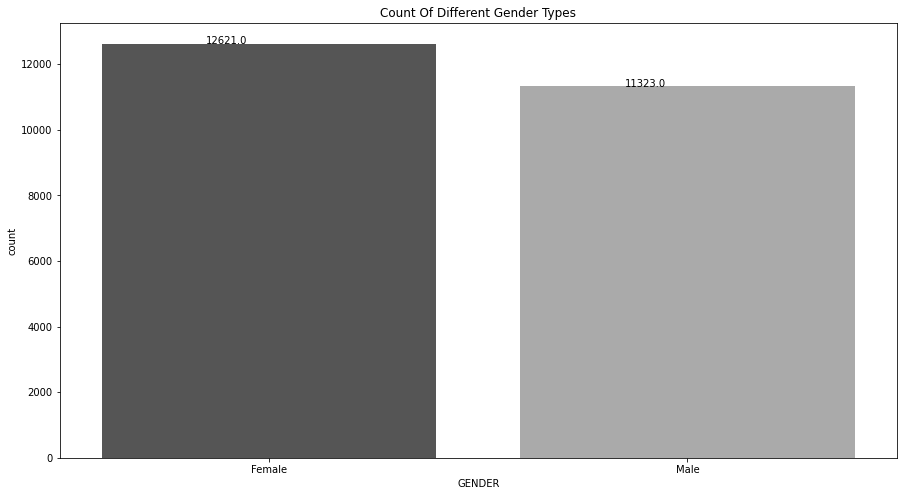

In [ ]:
fig = plt.figure()
fig = plt.figure(figsize =(15, 8))

ax = sns.countplot(x='GENDER', data=df_train, palette='binary_r')
plt.title('Count Of Different Gender Types')
for g in ax.patches:
  ax.annotate('{:.1f}'.format(g.get_height()), (g.get_x()+0.25, g.get_height()+0.01))

plt.show()

#### **4.2.2. Barplot Showing The Count Of People With Critical Illness**

<Figure size 432x288 with 0 Axes>

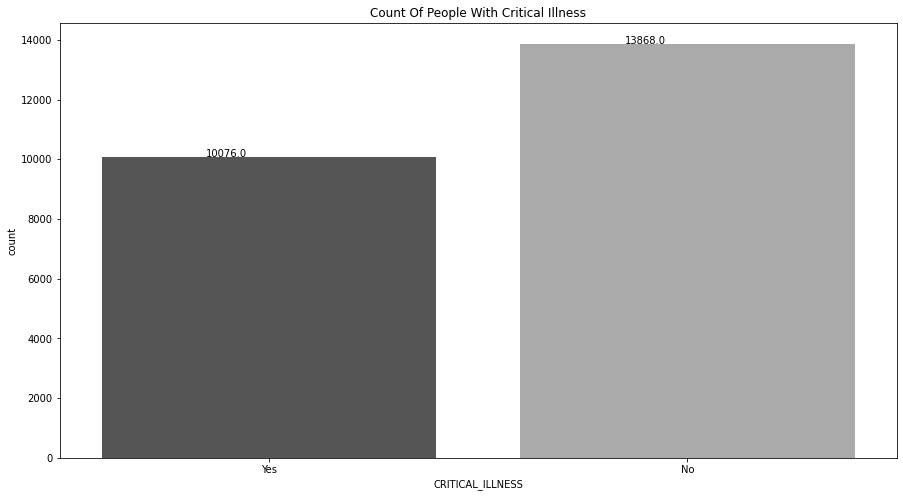

In [ ]:
fig = plt.figure()
fig = plt.figure(figsize =(15, 8))

ax = sns.countplot(x='CRITICAL_ILLNESS', data=df_train, palette='binary_r')
plt.title('Count Of People With Critical Illness')
for g in ax.patches:
  ax.annotate('{:.1f}'.format(g.get_height()), (g.get_x()+0.25, g.get_height()+0.01))

plt.show()

#### **4.2.3. Barplot Showing The Count Of People With Emergency Savings**

<Figure size 432x288 with 0 Axes>

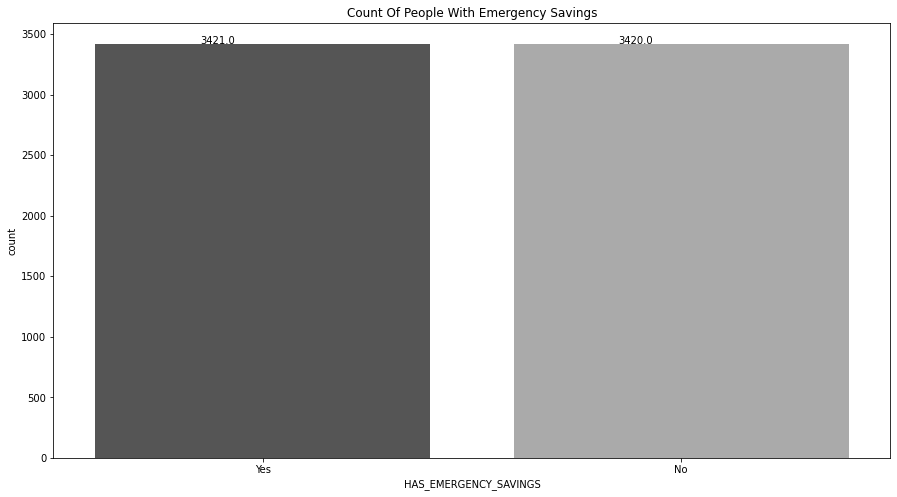

In [ ]:
fig = plt.figure()
fig = plt.figure(figsize =(15, 8))

ax = sns.countplot(x='HAS_EMERGENCY_SAVINGS', data=df_validation, palette='binary_r')
plt.title('Count Of People With Emergency Savings')
for g in ax.patches:
  ax.annotate('{:.1f}'.format(g.get_height()), (g.get_x()+0.25, g.get_height()+0.01))

plt.show()

#### **4.2.4. Line Plot Showing Relationship Between `Years Supporting Child` and `Target Monthly Income`**

<Figure size 432x288 with 0 Axes>

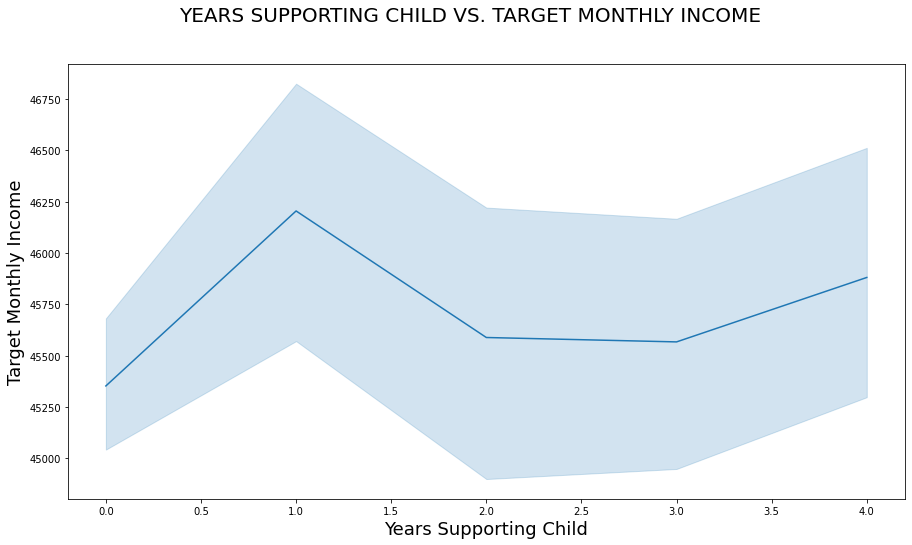

In [ ]:
# line plot showing relationship between years supporting child vs. target monthly income
fig = plt.figure()
fig = plt.figure(figsize =(15, 8))
fig.suptitle('YEARS SUPPORTING CHILD VS. TARGET MONTHLY INCOME \n', fontsize=20)
plt.xlabel('Years Supporting Child', fontsize=18)
plt.ylabel('Target Monthly Income', fontsize=18)
sns.lineplot(data=df_train, x='YEARS_SUPPORTING_CHILD', y='TARGET_MONTHLY_INCOME')
#plt.savefig("income-scatterplot.png")
plt.show()

<Figure size 432x288 with 0 Axes>

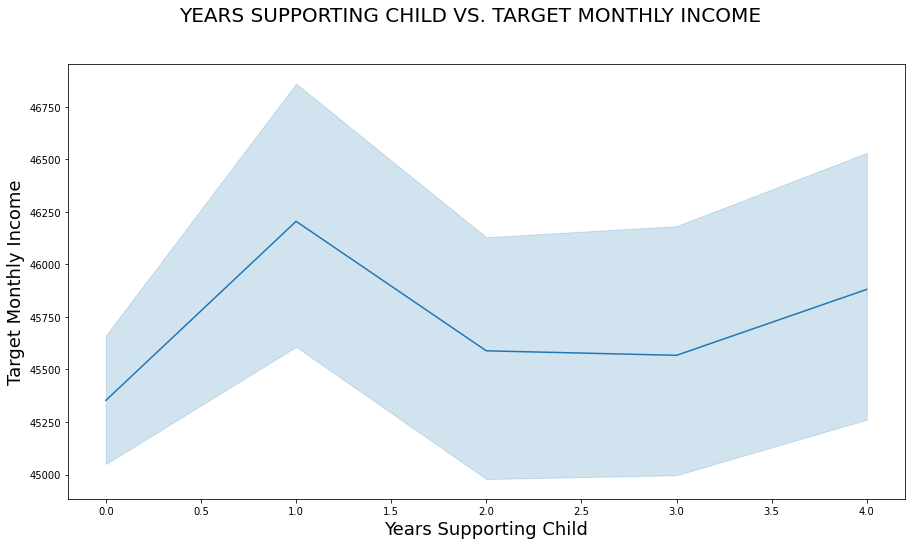

In [ ]:
# line plot showing relationship between years supporting child vs. target monthly income
fig = plt.figure()
fig = plt.figure(figsize =(15, 8))
fig.suptitle('YEARS SUPPORTING CHILD VS. TARGET MONTHLY INCOME \n', fontsize=20)
plt.xlabel('Years Supporting Child', fontsize=18)
plt.ylabel('Target Monthly Income', fontsize=18)
sns.lineplot(data=df_train, x='YEARS_SUPPORTING_CHILD', y='TARGET_MONTHLY_INCOME')
#plt.savefig("income-scatterplot.png")
plt.show()

#### **4.2.5. Line Plot Showing Relationship Between `Years Supporting Someone Else` and `Target Monthly Income`**

<Figure size 432x288 with 0 Axes>

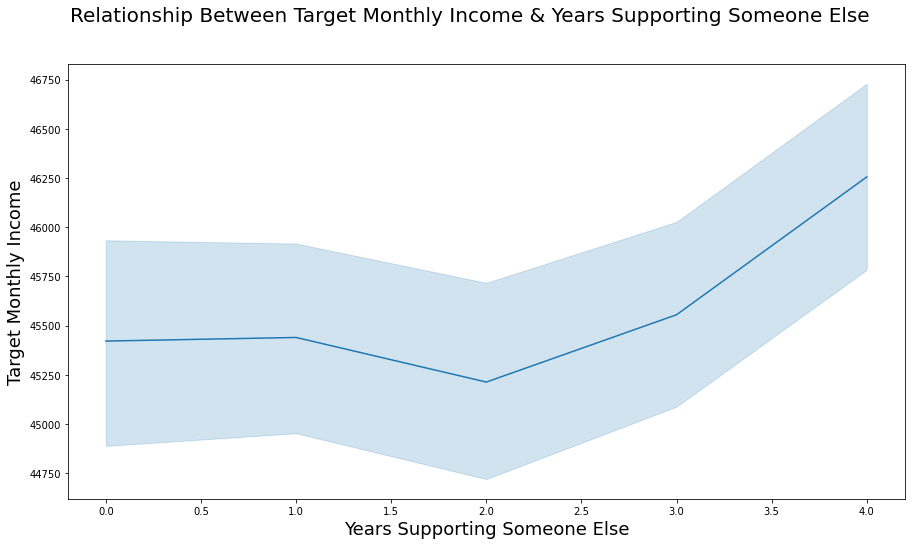

In [ ]:
# line plot showing relationship between years supporting someone else vs. target monthly income
fig = plt.figure()
fig = plt.figure(figsize =(15, 8))

fig.suptitle('Relationship Between Target Monthly Income & Years Supporting Someone Else \n', fontsize=20)
plt.xlabel('Years Supporting Someone Else', fontsize=18)
plt.ylabel('Target Monthly Income', fontsize=18)
sns.lineplot(data=df_train, x="YEARS_SUPPORTING_SOMEONE_ELSE", y="TARGET_MONTHLY_INCOME")
plt.show()

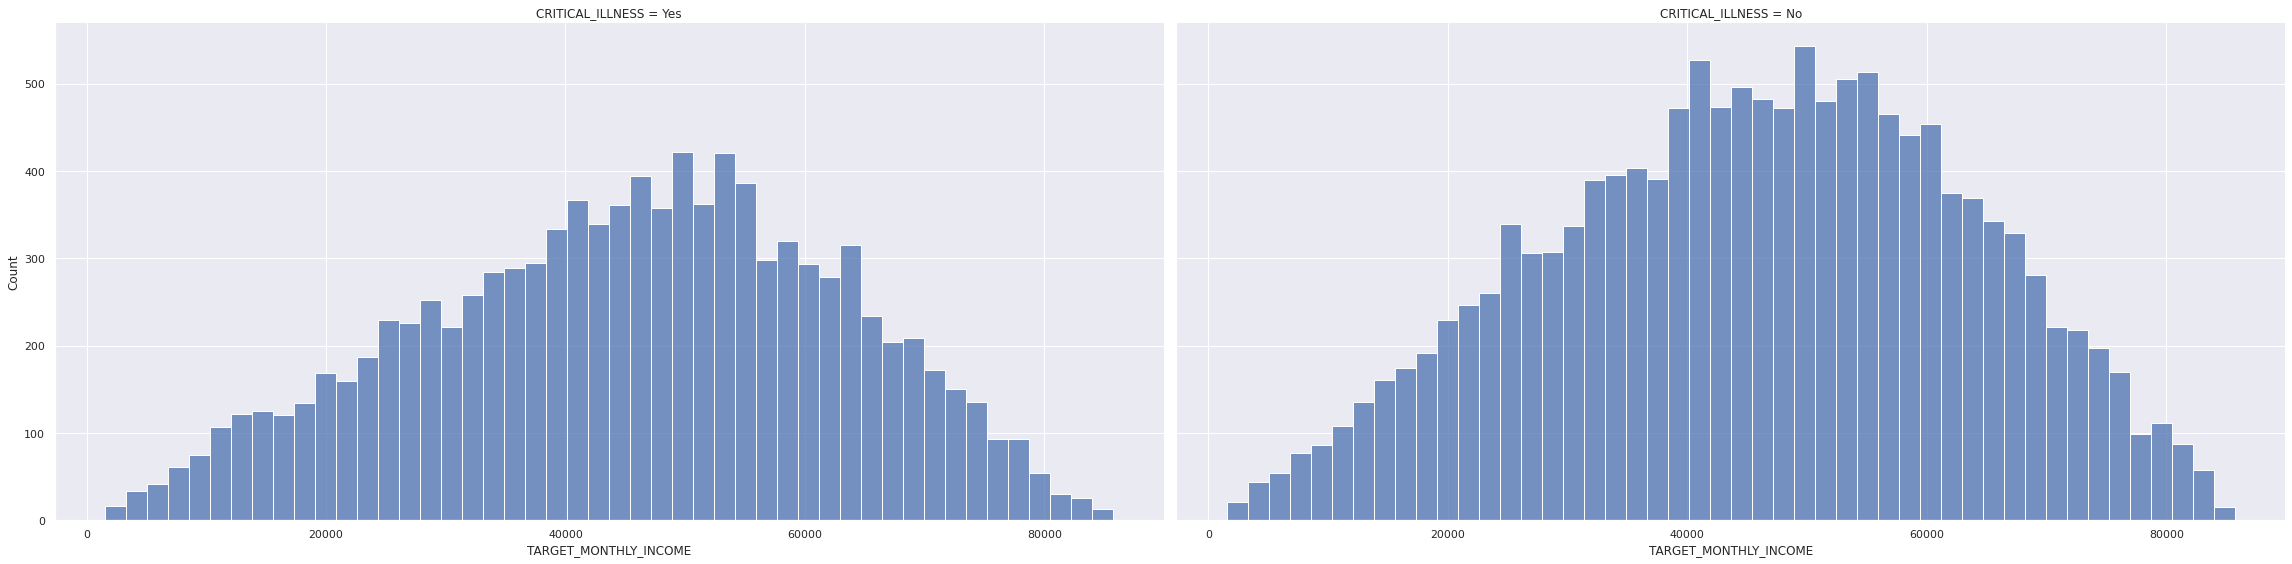

In [ ]:
sns.displot(df_train, x="TARGET_MONTHLY_INCOME", col="CRITICAL_ILLNESS", height=8, aspect=2)


<a id="five"></a>
## <font color='goldenrod'>**5. Feature Engineering**</font>
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description:  ⚡ |
| :--------------------------- |
| In this section, the team will clean the dataset and remove or add feature if necessary. |

---


In [ ]:
def replace_names(df):
  df.columns = [col.replace(": ","_") for col in df.columns] 
  df.columns = [col.replace(" ","_") for col in df.columns]
  return df

df_train = replace_names(df_train)
df_test = replace_names(df_test)
df_validation = replace_names(df_validation)

### **5.1. Dealing With Ordinal Categorical Features**

*   There are some categorical fetures in our datasets such as `HAS_EMERGENCY_SAVINGS`, `CRITICAL_ILLNESS` and so on, we will go ahead to le=abel encode these features using the label encoder library.

*   We will create a function for this and will apply on all three datasets.



In [ ]:
#==============================================================================================================================================
#create a variable for the ordinal categories

categ = ['FINANCIALLY_SUPPORT_PARTNER', 'FINANCIALLY_SUPPORT_CHILDREN', 'CRITICAL_ILLNESS', 'HAS_EMERGENCY_SAVINGS', 'GENDER', 'SPOUSE_GENDER']
#==============================================================================================================================================
# Encode Categorical Columns

enc = OrdinalEncoder()
df_train[categ] = enc.fit_transform(df_train[categ])
df_test[categ] = enc.transform(df_test[categ])
df_validation[categ] = enc.transform(df_validation[categ])
#===============================================================================================================================================

### **5.2. Dealing With Continous Categorical Variables**
There are other variables in our datasets that are continous, we have such like `SPOUSE_DATE_OF_BIRTH`, here we try to change it to date-time-data type  by using the `pd_datetime` and then we extract only the year, since the year of birth simply tells us how old the retiree's spouse age is.

In [ ]:
#=========================================================================================================================
#convert column to datetime and extract only the year for all three datasets
df_train['SPOUSE_DATE_OF_BIRTH'] = pd.to_datetime(df_train['SPOUSE_DATE_OF_BIRTH']) 
df_train['SPOUSE_DATE_OF_BIRTH'] = pd.to_datetime(df_train['SPOUSE_DATE_OF_BIRTH'],format='%Y%m%d') 
df_train['SPOUSE_DATE_OF_BIRTH'] = pd.DatetimeIndex(df_train['SPOUSE_DATE_OF_BIRTH']).year
#=========================================================================================================================
df_test['SPOUSE_DATE_OF_BIRTH'] = pd.to_datetime(df_test['SPOUSE_DATE_OF_BIRTH']) 
df_test['SPOUSE_DATE_OF_BIRTH'] = pd.to_datetime(df_test['SPOUSE_DATE_OF_BIRTH'],format='%Y%m%d')
df_test['SPOUSE_DATE_OF_BIRTH'] = pd.DatetimeIndex(df_test['SPOUSE_DATE_OF_BIRTH']).year
#=========================================================================================================================
df_validation['SPOUSE_DATE_OF_BIRTH'] = pd.to_datetime(df_validation['SPOUSE_DATE_OF_BIRTH'])
df_validation['SPOUSE_DATE_OF_BIRTH'] = pd.to_datetime(df_validation['SPOUSE_DATE_OF_BIRTH'],format='%Y%m%d')
df_validation['SPOUSE_DATE_OF_BIRTH'] = pd.DatetimeIndex(df_validation['SPOUSE_DATE_OF_BIRTH']).year

### **5.3. Dealing With Null Features**

*  From our Statistical EDA; you can review here - <a href=#four>4. Exploratory Data Analysis (EDA)</a>, we see that we have more than 10% of null values for the features that indicated null values.

*   We have to fill the null values with Zero values.

*   We will create a function that will do this for us, so we can appply on all datasets rather than repeating codes.




In [ ]:
def null_values(df):
  df = df.fillna(0)
  return df

#applying function to all datasets
df_train = null_values(df_train)
df_validation = null_values(df_validation)
df_test = null_values(df_test)

**Checking The Distribution Of Our Target Variable**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


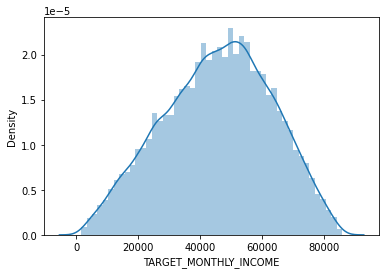

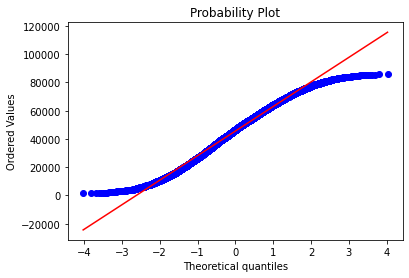

In [ ]:
import pylab
import scipy.stats as stats
sns.distplot(df_train['TARGET_MONTHLY_INCOME'])
fig=plt.figure()
plot_1=stats.probplot(df_train['TARGET_MONTHLY_INCOME'],dist='norm', plot=pylab)


<a id="six"></a>
## <font color='goldenrod'>**6. Building Of Models**</font>
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description:  ⚡ |
| :--------------------------- |
| In this section, the team will build varios regression models for predictions. |

---


### **7.1 Splitting Into Train and Test sets**

*   We will be using the train dataset for the training sets and the validation dataset for the testing sets.

*   We will then use the test dataset for the evaluation of our model on unseen data.

In [ ]:
#assigning splits using thebtest and train datasets, we retain the valdation sets to test our model performance on unseen data
X_train = df_train.drop(['TARGET_MONTHLY_INCOME'], axis=1)
X_test = df_test.drop(['TARGET_MONTHLY_INCOME'], axis=1)
y_train = df_train[['TARGET_MONTHLY_INCOME']]
y_test = df_test['TARGET_MONTHLY_INCOME']
X_val = df_validation.drop(['TARGET_MONTHLY_INCOME'], axis=1)
y_val = df_validation['TARGET_MONTHLY_INCOME']



X_train2 = X_train.copy()
X_test2 = X_test.copy()
X_val2 = X_val.copy()

### **7.2. Standardising Our Data**

We from what we can see in the Statistical EDA - We have to normalise our data using the StandardScaler, to bring our values between `0 and 1`

In [ ]:
non_categ = ['Unnamed_0', 'RETIREMENT_AGE', 'RETIREMENT_FUND_VALUE', 'UNIT_TRUST_EAC_PA_INCL_VAT', 'LA_EAC_PA_INCL_VAT', 'LAP_EAC_PA_INCL_VAT', 'INTERNATIONAL_CASH_LAP', 
             'INTERNATIONAL_BOND_LAP', 'INTERNATIONAL_EQUITY_LAP', 'SA_CASH_LAP', 'SA_BOND_LAP', 'SA_EQUITY_LAP', 'INTERNATIONAL_CASH_UNIT_TRUST', 'INTERNATIONAL_BOND_UNIT_TRUST', 'INTERNATIONAL_EQUITY_UNIT_TRUST', 
             'SA_CASH_UNIT_TRUST', 'SA_BOND_UNIT_TRUST', 'SA_EQUITY_UNIT_TRUST', 'PERCENTAGE_SUCCESS', 'SPOUSE_DATE_OF_BIRTH', 'SPOUSE_RETIREMENT_AGE', 'ONGOING_PLANNER_FEE_INCL_VAT_LA_AND_LAP', 
             'ONGOING_PLANNER_FEE_INCL_VAT_UT', 'INITIAL_PLANNER_FEE_INCL_VAT_LA_AND_LAP', 'DEPT_VALUE', 'CURRENT_NET_MONTHLY_INCOME', 'SPARE_CASH_VALUE', 'YEARS_SUPPORTING_CHILD', 'CHILD_MONTHLY_SUPPORTING_VALUE', 
             'YEARS_SUPPORTING_SOMEONE_ELSE', 'OTHER_MONTHLY_SUPPORTING_VALUE', 'ONGOING_COACHING_FEE', 'CONFIDENCE_LEVEL', 'INITIAL_PLANNER_FEE_INCL_VAT_UT']

sc = StandardScaler()
X_train[non_categ] = sc.fit_transform(X_train[non_categ])
X_test[non_categ] = sc.transform(X_test[non_categ])
X_val[non_categ] = sc.transform(X_val[non_categ])


X_train = pd.DataFrame(X_train,columns=X_train2.columns)
X_test = pd.DataFrame(X_test,columns=X_test2.columns)
X_val = pd.DataFrame(X_val,columns=X_val2.columns)

### **7.3. Model Building Based On Historical Performance**

Based on research, we have decided to build our model using three best performing algorithms across different projects. These are;


*   `XGBOOST REGRESSOR`

*   `CATBOOST REGRESSOR`

*   `NEURAL NETWORS`



### **7.3.1. LIGHT GBM**

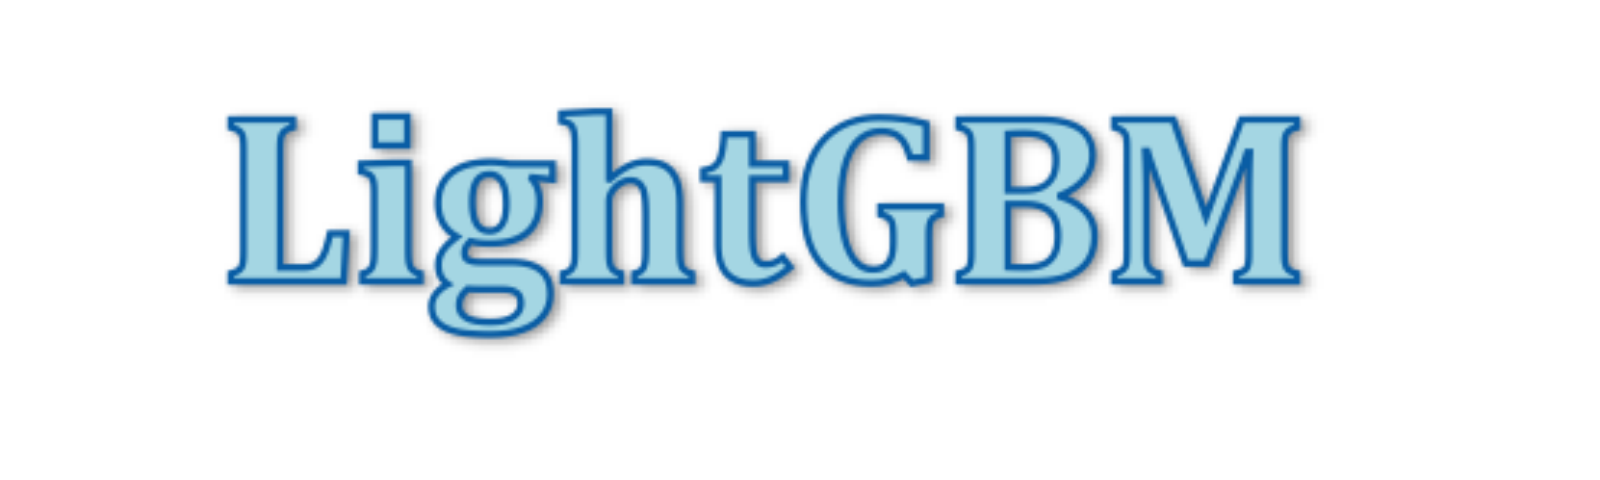

 LightGBM is an open-source gradient boosting framework that based on tree learning algorithm and designed to process data faster and provide better accuracy. It can handle large datasets with lower memory usage and supports distributed learning.

LightGBM uses the leaf-wise tree growth algorithm, while many other popular tools use depth-wise tree growth. Compared with depth-wise growth, the leaf-wise algorithm can converge much faster. However, the leaf-wise growth may be over-fitting if not used with the appropriate parameters.

To get good results using a leaf-wise tree, these are some important parameters:




*   `num_leaves`. This is the main parameter to control the complexity of the tree model. Theoretically, we can set `num_leaves` = 2^(`max_depth`) to obtain the same number of leaves as depth-wise tree. However, this simple conversion is not good in practice. The reason is that a leaf-wise tree is typically much deeper than a depth-wise tree for a fixed number of leaves. Unconstrained depth can induce over-fitting. Thus, when trying to tune the `num_leaves`, we should let it be smaller than 2^(`max_depth`). For example, when the `max_depth`=7 the depth-wise tree can get good accuracy, but setting num_leaves to `127` may cause over-fitting, and setting it to `70 or 80` may get better accuracy than depth-wise.

*   `min_data_in_leaf`. This is a very important parameter to prevent over-fitting in a leaf-wise tree. Its optimal value depends on the number of training samples and `num_leaves`. Setting it to a large value can avoid growing too deep a tree, but may cause under-fitting. In practice, setting it to hundreds or thousands is enough for a large dataset.

*   `max_depth`. You also can use `max_depth` to limit the tree depth explicitly.

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

#lgb_train = lgb.Dataset(X_train, y_train)
#lgb_val = lgb.Dataset(X_val, y_val)


# laoding data

print('Start training...')
print("===================================================================================================================================================================================================")
print("===================================================================================================================================================================================================")
# fitting the model
lgb_base_model = lgb.LGBMRegressor(boosting = 'gbdt', num_leaves = 75, reg_alpha = 0.75, 
                                   reg_lambda= 0.75, learnnig_rate = 0.025, max_bin = 40,
                                   bagging_fraction = 0.8, min_split_gain = 0.03, feature_fraction = 0.75,
                                   num_iterations = 500, max_depth = 7, bagging_freq = 10, min_data_in_leaf = 100, min_sum_hessian_in_leaf = 30,
                                   objective='rmse', seed=8798, num_threads=4)

lgb_model = lgb_base_model.fit(X_train, y_train, eval_set=[(X_val, y_val), (X_train, y_train)], verbose=10, early_stopping_rounds=10)

print("===================================================================================================================================================================================================")
print("===================================================================================================================================================================================================")

Start training...
Training until validation scores don't improve for 10 rounds.


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	training's rmse: 10559.4	valid_0's rmse: 10932.1
[20]	training's rmse: 7089.69	valid_0's rmse: 7588.93
[30]	training's rmse: 5603.16	valid_0's rmse: 6234.34
[40]	training's rmse: 4525.89	valid_0's rmse: 5234.95
[50]	training's rmse: 3947.88	valid_0's rmse: 4738.51
[60]	training's rmse: 3504.89	valid_0's rmse: 4338.74
[70]	training's rmse: 3165.9	valid_0's rmse: 4052.8
[80]	training's rmse: 2937.2	valid_0's rmse: 3844.43
[90]	training's rmse: 2735.53	valid_0's rmse: 3661.23
[100]	training's rmse: 2576.4	valid_0's rmse: 3516.12
[110]	training's rmse: 2479.17	valid_0's rmse: 3446.92
[120]	training's rmse: 2374.21	valid_0's rmse: 3360.36
[130]	training's rmse: 2301.95	valid_0's rmse: 3315.37
[140]	training's rmse: 2233.51	valid_0's rmse: 3260.93
[150]	training's rmse: 2168.98	valid_0's rmse: 3207.57
[160]	training's rmse: 2118.99	valid_0's rmse: 3178.62
[170]	training's rmse: 2071.63	valid_0's rmse: 3149.81
[180]	training's rmse: 2019.75	valid_0's rmse: 3119.46
[190]	training's rmse: 

Plot metrics during training...


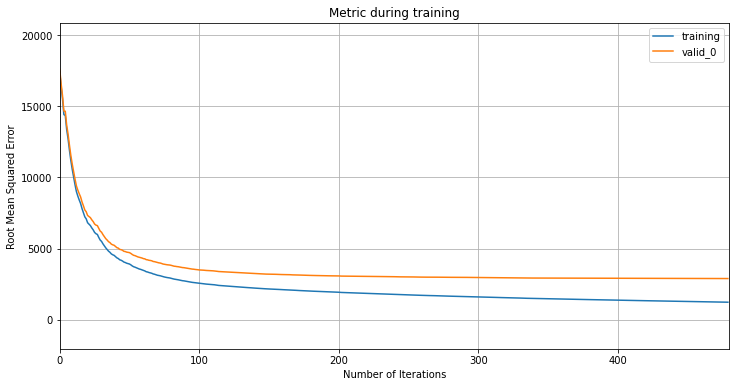

In [ ]:
print('Plot metrics during training...')

ax = lgb.plot_metric(lgb_model, figsize=(12,6))
plt.xlabel('Number of Iterations')
plt.ylabel('Root Mean Squared Error')
plt.show()

In [ ]:
# prediction
print('Start predicting...')
lgb_pred = lgb_model.predict(X_test)

# accuracy check
mse = mean_squared_error(y_test, lgb_pred)
lgb_rmse = mse**(0.5)
lgb_r_score = r2_score(y_test, lgb_pred)

lgb_mae = mean_absolute_error(y_test, lgb_pred)
errors = abs(lgb_pred - y_test)
lgb_mape = 100 * np.mean(errors / y_test)

print('\n**********************************************************')
print('LIGTHGBM METRICS ON TEST DATA')
print('**********************************************************')
print()
print("RMSE: %.2f" % lgb_rmse)
print("R2 SCORE: %.2f" %lgb_r_score)
print("MAE: %2f" %lgb_mae)
print("MAPE :%.2f" %lgb_mape )
print()
print('**********************************************************')
print('\nPrediction Complete')

Start predicting...

**********************************************************
LIGTHGBM METRICS ON TEST DATA
**********************************************************

RMSE: 3081.72
R2 SCORE: 0.96
MAE: 2346.592678
MAPE :11.42

**********************************************************

Prediction Complete


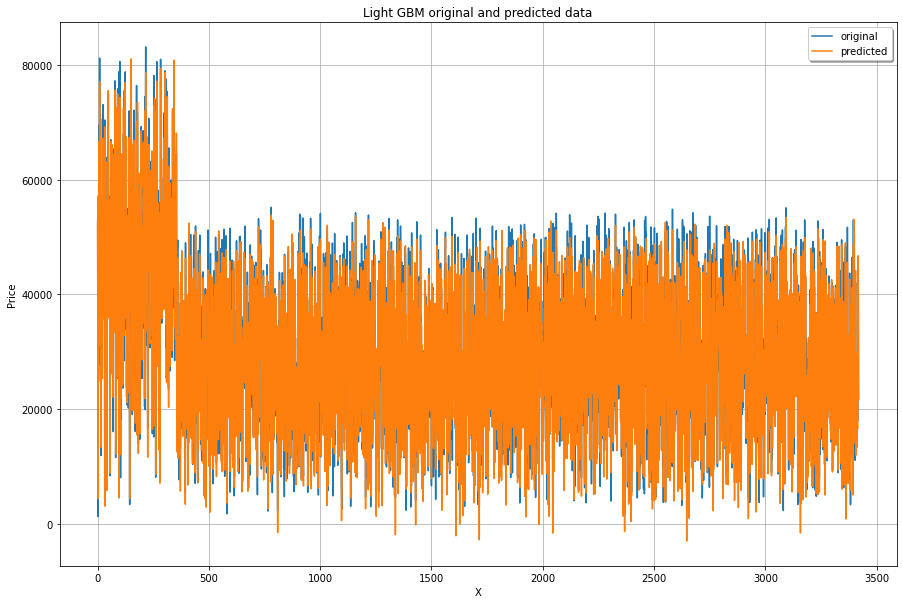

In [ ]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(15, 10))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, lgb_pred, label="predicted")
plt.title("Light GBM original and predicted data")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

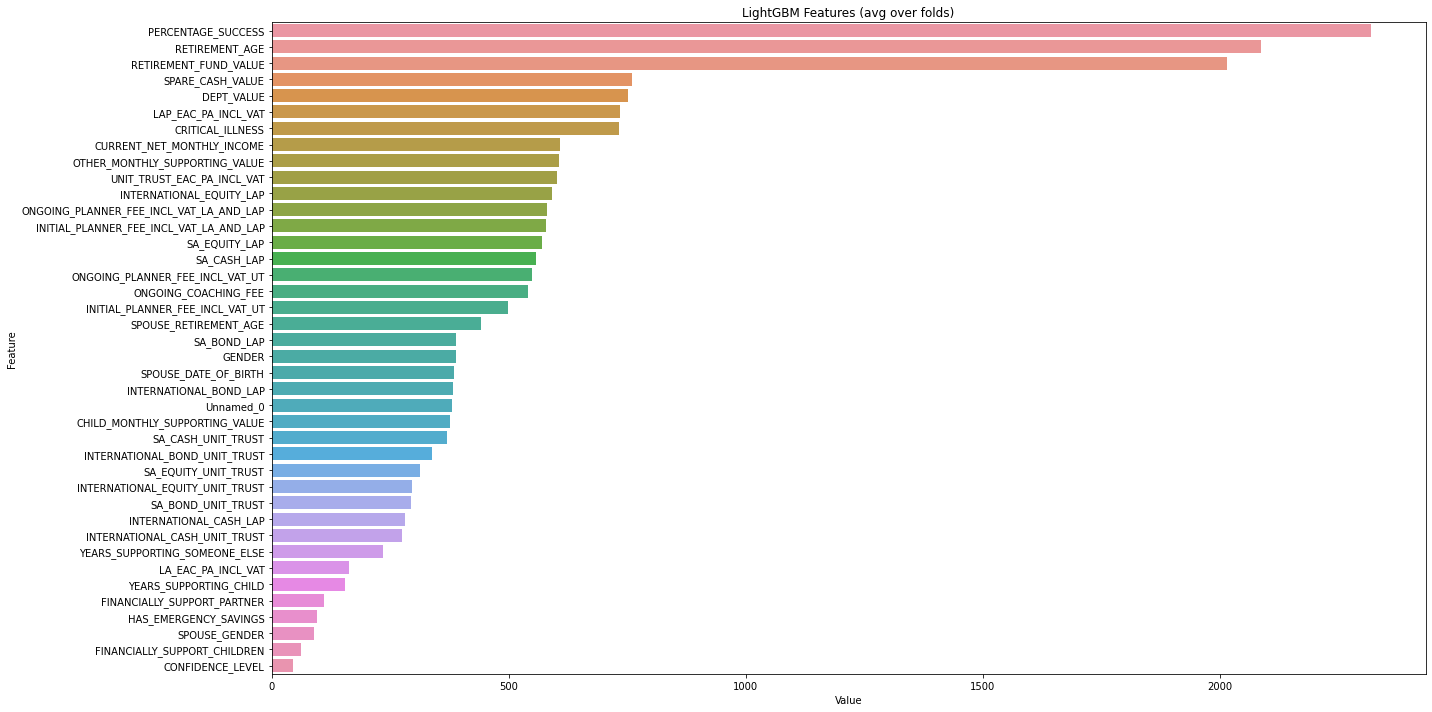

<Figure size 432x288 with 0 Axes>

In [ ]:
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgb_model.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

We can see from the density plot that the difference between our original values and the predicted values lies somewhere between `10,000`

### **7.3.2. XGBoost**

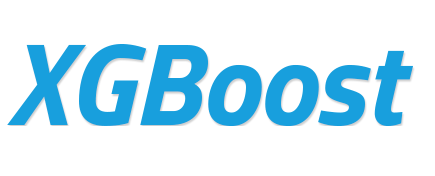

**What is XGBoost?**

XGBoost is a gradient boosting algorithm that is widely used in data science. It is an implementation of gradient boosting that is designed to be highly efficient, flexible and portable.

**How does XGBoost work?**

XGBoost works by combining a number of weak learners to form a strong learner. A weak learner is a machine learning model that is only slightly better than random guessing. However, when weak learners are combined, they can form a strong learner that is much more accurate.





Since we have the basic idea of how XGBoost works, we will dive into it's application on the project.

>  The most important parameters are:

*   `max_depth`: The maximum depth of the decision trees
*   `eta`: The learning rate.
*   `gamma`: The minimum loss reduction required to make a split.
*   `subsample`: The fraction of the training data that is used to train each tree.



In [ ]:
# we will instantiate our regressor model
from xgboost import XGBRegressor

xgb = XGBRegressor(
    max_depth = 6, learning_rate = 0.015, n_estimators = 1400, tree_method = 'hist', sampling_method = 'uniform',
    objective = "reg:linear", booster = 'gbtree', eval_metric = 'rmse', max_leaves = 70,
    n_jobs = 1, gamma = 50, min_child_weight = 18, subsample = 0.7, colsample_bytree = 0.7, 
    colsample_bylevel = 0.7, colsample_bynode = 0.7, reg_alpha = 0.75, 
    reg_lambda = 0.75, scale_pos_weight = 1, base_score = 0.65, max_bin = 50,
    random_state = 10, importance_type = "gain")

eval_set = [(X_train, y_train), (X_val, y_val)]

xgb_baseline_model = xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="rmse", eval_set=[(X_train, y_train), (X_val, y_val)], verbose=True)

[14:05:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:48118	validation_1-rmse:48044.9
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:47430.2	validation_1-rmse:47360.9
[2]	validation_0-rmse:46756.1	validation_1-rmse:46691.3
[3]	validation_0-rmse:46115.4	validation_1-rmse:46051.5
[4]	validation_0-rmse:45516.7	validation_1-rmse:45455.9
[5]	validation_0-rmse:44880.5	validation_1-rmse:44824.7
[6]	validation_0-rmse:44241	validation_1-rmse:44188.4
[7]	validation_0-rmse:43669.6	validation_1-rmse:43637.5
[8]	validation_0-rmse:43054.1	validation_1-rmse:43025.3
[9]	validation_0-rmse:42446.8	validation_1-rmse:42422
[10]	validation_0-rmse:41902	validation_1-rmse:41887.8
[11]	validation_0-rmse:41322	validation_1-rmse:41312.7
[12]	validation_0-rmse:40743.2	validation_1-rmse:4

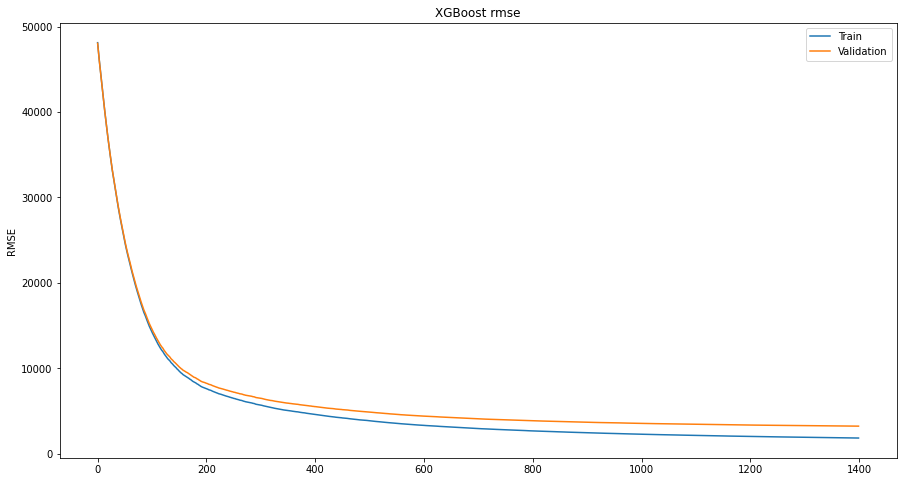

In [ ]:
from matplotlib import pyplot

# retrieve performance metrics
results = xgb_baseline_model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# plot rmse
fig, ax = pyplot.subplots(figsize=(15,8))
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Validation')
ax.legend()
pyplot.ylabel('RMSE')
pyplot.title('XGBoost rmse')
pyplot.show()

In [ ]:
# prediction on test data
print('Start predicting...')

xgb_test_pred = xgb_baseline_model.predict(X_test)

mse = mean_squared_error(y_test, xgb_test_pred)
xgb_rmse = mse **0.5
xgb_r_score = r2_score(y_test, xgb_test_pred)
xgb_mae = mean_absolute_error(y_test, xgb_test_pred)

errors = abs(xgb_test_pred - y_test)
xgb_mape = 100 * np.mean(errors / y_test)


print('\n**********************************************************')
print('XGBOOST METRICS ON TEST DATA')
print('**********************************************************')
print()
print(f'XGBOOST RMSE ON TEST DATA: {xgb_rmse}')
print(f'XGBOOST R2 SCORE ON TEST DATA: {round(xgb_r_score, 2)}')
print(f'XGBOOST MAE ON TEST DATA: {xgb_mae}')
print(f'XGBOOST MAPE ON TEST DATA: {round(xgb_mape, 2)}')
print()
print('**********************************************************')
print('\nPrediction Complete')

Start predicting...

**********************************************************
XGBOOST METRICS ON TEST DATA
**********************************************************

XGBOOST RMSE ON TEST DATA: 3198.718538238496
XGBOOST R2 SCORE ON TEST DATA: 0.95
XGBOOST MAE ON TEST DATA: 2531.513950786256
XGBOOST MAPE ON TEST DATA: 12.61

**********************************************************

Prediction Complete


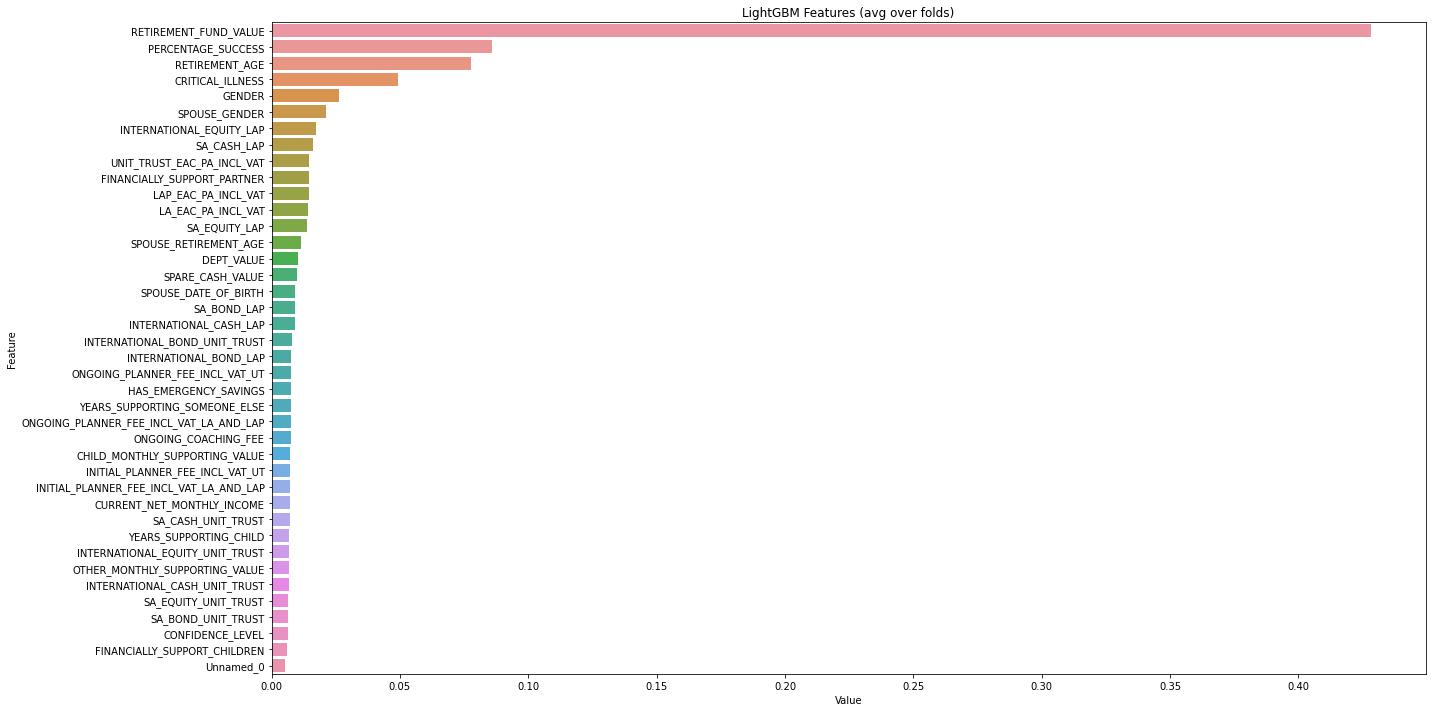

<Figure size 432x288 with 0 Axes>

In [ ]:
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(xgb_baseline_model.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

### **7.3.2. CatBoost**

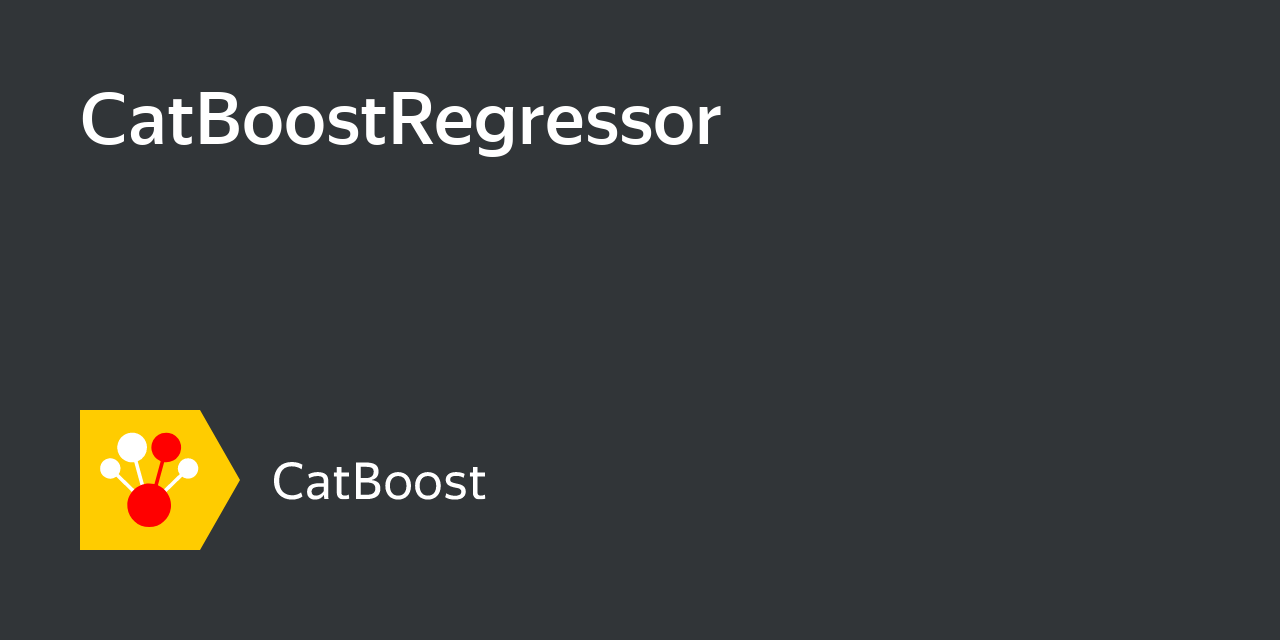

**What Is CATBoost?**

> CATBOOST is an open-source machine learning library developed by a Russian search engine giant Yandex. One of the prominent aspects of catboost is its ability to handle missing data and categorical data without encoding but will get to that later. It makes feature engineering tasks easier and in some cases extinct. As the name suggests it’s a boosting algorithm, building trees sequentially and reducing error in each iteration. Though catboost isn’t as popular(Google trends show the popularity of catboost vs xgboost vs lightgbm) as XGBoost, it’s a powerful library and a good one to explore. In addition to regression and classification tasks, it can also be used for forecasting as well as recommendation systems.



Some Important Parameters when using catboost are;

*   `loss_function` – Metric that the model tries to optimize. If used RMSE – model optimizes weights to reduce RMSE.

*   `learning_rate` – Sequentially as the trees are formed, the amount of say each tree has in the prediction. Ideally NEW_PREDICTION = avg_prediction + learning_rate * new_tree_prediction_1 + learning_rate * new_tree_prediction_2 + …….+ learning_rate * new_tree_prediction_n

*   `n_estimators` – number of trees to be built sequentially
*   `eval_metric` – Metric used for overfitting detection.



In [ ]:
# setting up our parameters
params = {
    'loss_function' : 'RMSE',
    'eval_metric' : 'RMSE',
    'learning_rate': 0.022, 
    'iterations': 5000, 
    'depth': 6, 
    'random_seed': 55, 
    'metric_period': 10, 
    'od_type': 'Iter',
    'od_wait': 50, 
    'verbose': 1,
    'l2_leaf_reg': 0.8}

cat = CatBoostRegressor(**params)

#instantiating ou regressor model and fiotting to our data
cat_base_model = cat.fit(X_train, y_train,
                         eval_set=(X_val, y_val),
                         use_best_model=True,early_stopping_rounds=10,
                         plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 17243.3378620	test: 17380.1546967	best: 17380.1546967 (0)	total: 54.7ms	remaining: 4m 33s
10:	learn: 15081.0312435	test: 15205.4996525	best: 15205.4996525 (10)	total: 133ms	remaining: 1m
20:	learn: 13424.6805698	test: 13533.1373518	best: 13533.1373518 (20)	total: 208ms	remaining: 49.2s
30:	learn: 12124.1321430	test: 12213.7160438	best: 12213.7160438 (30)	total: 285ms	remaining: 45.6s
40:	learn: 11077.4543083	test: 11152.0939997	best: 11152.0939997 (40)	total: 359ms	remaining: 43.4s
50:	learn: 10245.8109950	test: 10303.1649649	best: 10303.1649649 (50)	total: 430ms	remaining: 41.7s
60:	learn: 9577.5439026	test: 9616.8865522	best: 9616.8865522 (60)	total: 503ms	remaining: 40.7s
70:	learn: 9027.9389705	test: 9060.2100932	best: 9060.2100932 (70)	total: 576ms	remaining: 40s
80:	learn: 8581.9474095	test: 8606.5145946	best: 8606.5145946 (80)	total: 647ms	remaining: 39.3s
90:	learn: 8211.0014729	test: 8230.1047254	best: 8230.1047254 (90)	total: 734ms	remaining: 39.6s
100:	learn: 7885.

##### **Prediction On The Test Dataset Using CatBoost Regressor**

In [ ]:
cat_pred = cat_base_model.predict(X_test)

cat_mse = mean_squared_error(y_test, cat_pred)
cat_rmse = cat_mse**0.5
cat_r_score = r2_score(y_test, cat_pred)
cat_mae = mean_absolute_error(y_test, cat_pred)

errors = abs(cat_pred - y_test)
cat_mape = 100 * np.mean(errors / y_test)

print('*****************************************************')
print('CATBOOST METRICS ON TEST DATA')
print('*****************************************************')
print()
print(f'CATBOOST RMSE ON TEST DATA: {cat_rmse}')
print(f'CATBOOST R2 SCORE ON TEST DATA: {cat_r_score}')
print(f'CATBOOST MAE ON TEST DATA: {cat_mae}')
print(f'CATBOOST MAPE ON TEST DATA: {round(cat_mape, 2)}')
print()
print('*****************************************************')

*****************************************************
CATBOOST METRICS ON TEST DATA
*****************************************************

CATBOOST RMSE ON TEST DATA: 2078.33666153708
CATBOOST R2 SCORE ON TEST DATA: 0.9797477240322316
CATBOOST MAE ON TEST DATA: 1524.0889057906268
CATBOOST MAPE ON TEST DATA: 7.28

*****************************************************


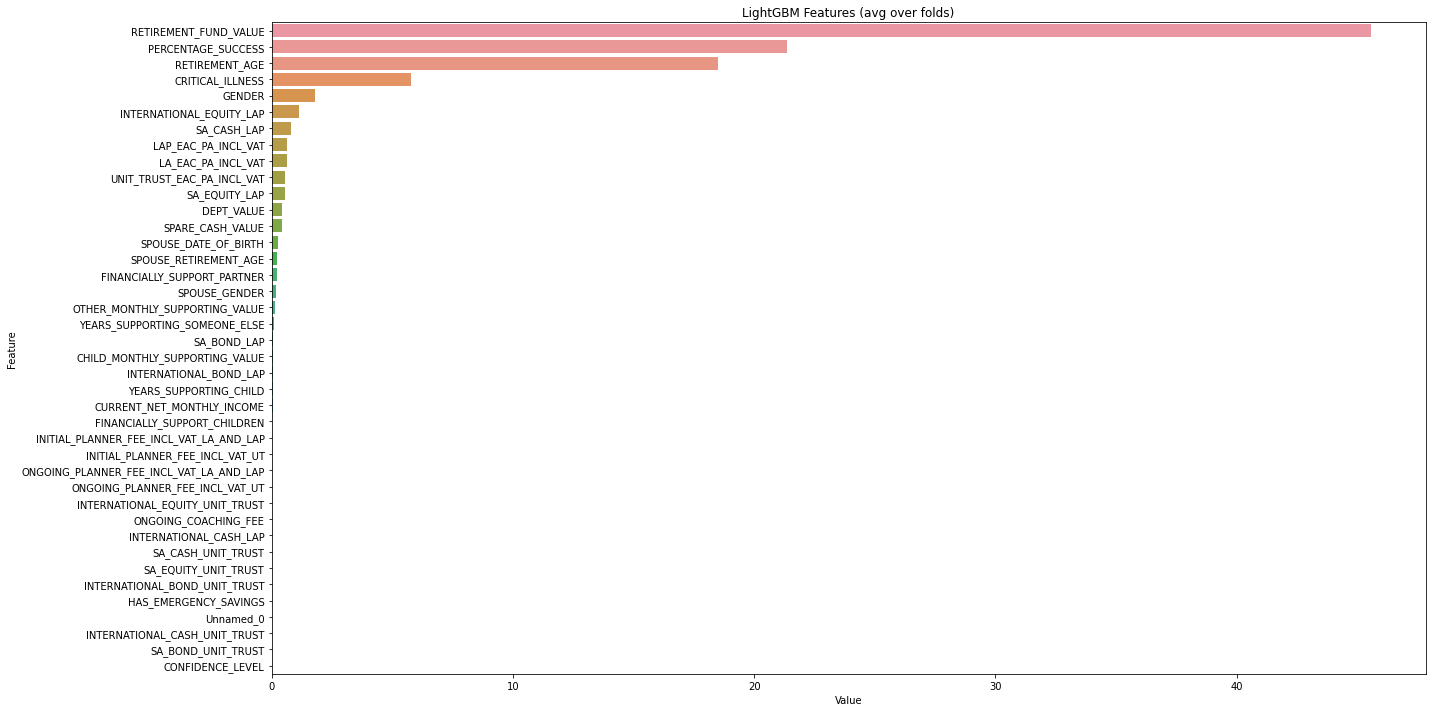

<Figure size 432x288 with 0 Axes>

In [ ]:
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(cat_base_model.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')


<a id="seven"></a>
## <font color='goldenrod'>**7. Model Performance**</font>
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description:  ⚡ |
| :--------------------------- |
| In this section, we will visualize the performance of our models. |

---


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

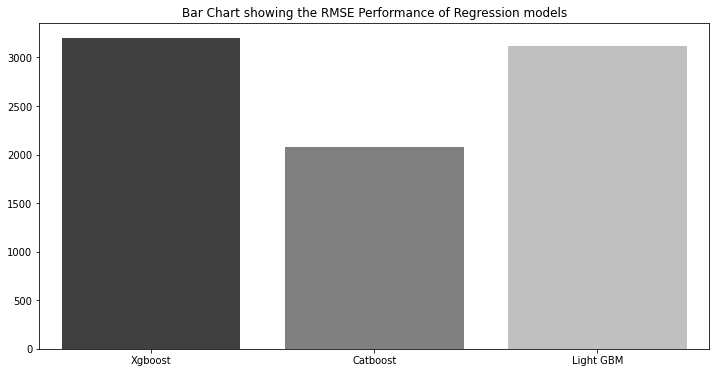

In [ ]:
fig = plt.figure()
fig = plt.figure(figsize =(12, 6))

sns.barplot(['Xgboost', 'Catboost', 'Light GBM'],[xgb_rmse,cat_rmse,lgb_rmse], palette='binary_r')
plt.title("Bar Chart showing the RMSE Performance of Regression models")
plt.savefig('RMSE-01.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

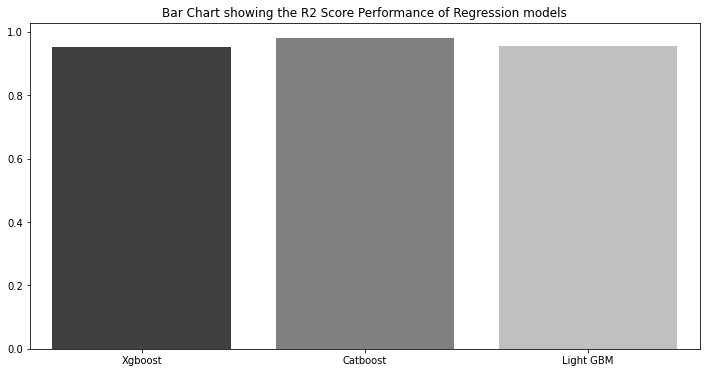

In [ ]:
fig = plt.figure()
fig = plt.figure(figsize =(12, 6))

sns.barplot(['Xgboost', 'Catboost', 'Light GBM'],[xgb_r_score,cat_r_score,lgb_r_score], palette='binary_r')
plt.title("Bar Chart showing the R2 Score Performance of Regression models")
plt.savefig('RSQUARED-01.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

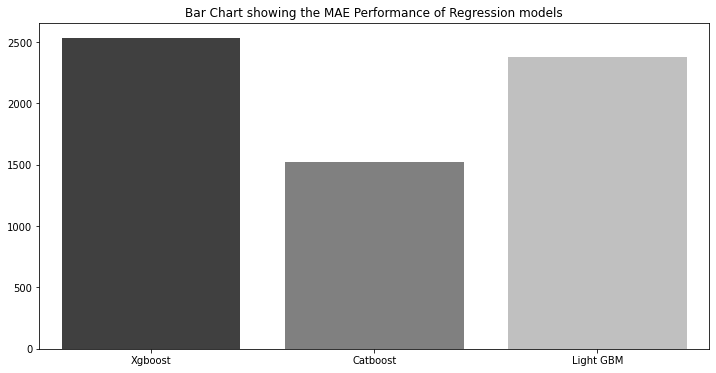

In [ ]:
fig = plt.figure()
fig = plt.figure(figsize =(12, 6))

sns.barplot(['Xgboost', 'Catboost', 'Light GBM'],[xgb_mae,cat_mae,lgb_mae], palette='binary_r')
plt.title("Bar Chart showing the MAE Performance of Regression models")
plt.savefig('MAE-01.png')

In [ ]:
import pickle
pickle.dump(lgb_model, open('lgb.sav', 'wb'))

lgb_model_Filename = "lgb_model.pkl"  
with open(lgb_model_Filename, 'wb') as file:  
    pickle.dump(lgb_model, file)

In [ ]:
pickle.dump(xgb_baseline_model, open('xgb.sav', 'wb'))

xgb_baseline_model_Filename = "xgb_baseline_model.pkl"  
with open(xgb_baseline_model_Filename, 'wb') as file:  
    pickle.dump(xgb_baseline_model, file)

In [ ]:
pickle.dump(cat_base_model, open('cat2.sav', 'wb'))

cat_base_model_Filename = "cat_base_model.pkl"  
with open(cat_base_model_Filename, 'wb') as file:  
    pickle.dump(cat_base_model, file)